In [2]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt

# import data
results_train = pd.read_csv('results_train.csv')
results_test = pd.read_csv('results_test.csv')


# convert column to string type
results_train['prediction_corrected'] = results_train['prediction_corrected'].astype(str)
results_test['prediction_corrected'] = results_test['prediction_corrected'].astype(str)

# add column if prediction is correct
results_train['correct'] = results_train['actual'] == results_train['prediction_corrected']
results_test['correct'] = results_test['actual'] == results_test['prediction_corrected']

# add column with true captcha length
results_train['actual_length'] = results_train['actual'].apply(len)
results_test['actual_length'] = results_test['actual'].apply(len)

# add column with predicted captcha length
results_train['prediction_length'] = results_train['prediction_corrected'].apply(len)
results_test['prediction_length'] = results_test['prediction_corrected'].apply(len)

# add column with difference between true and predicted captcha length
results_train['length_diff'] = results_train['actual_length'] - results_train['prediction_length']
results_test['length_diff'] = results_test['actual_length'] - results_test['prediction_length']

In [3]:
#train accuracy
results_train['correct'].mean()

0.8098960700542375

In [4]:
# accuracy
results_test['correct'].mean()

0.6367602945186801

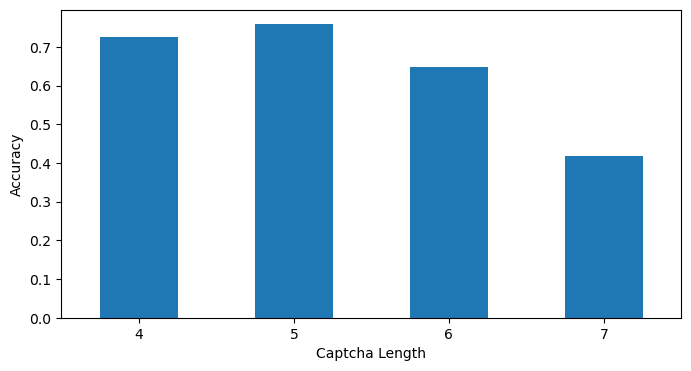

In [5]:
# set figure size
plt.figure(figsize=(8, 4))

# plot accuracy by length
results_test.groupby('actual_length')['correct'].mean().plot(kind='bar')

# set labels
plt.xlabel('Captcha Length')
plt.ylabel('Accuracy')

# rotate x-axis labels
plt.xticks(rotation=0);

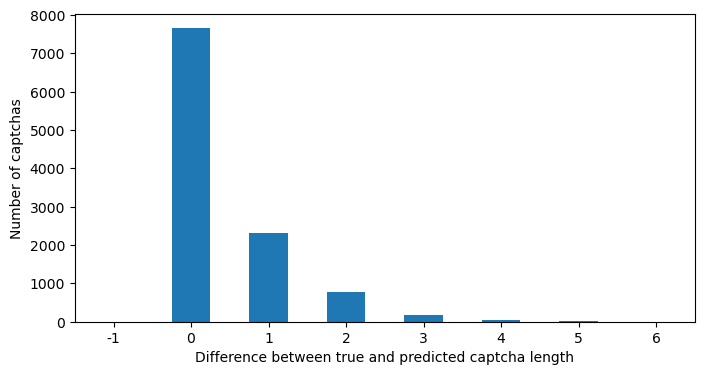

In [6]:
# set figure size
plt.figure(figsize=(8, 4))

# plot distribution of length differences
results_test['length_diff'].value_counts().sort_index().plot(kind='bar')

# set labels
plt.xlabel('Difference between true and predicted captcha length')
plt.ylabel('Number of captchas')

# rotate x-axis labels
plt.xticks(rotation=0);

In [7]:
# percentage of correct length predicted
sum(results_test['length_diff'] == 0)/len(results_test)

0.6954822288882829

In [8]:
results_test[results_test['length_diff'] >= 5]

,actual,prediction,prediction_corrected,correct,actual_length,prediction_length,length_diff
1727,NqYRqqL,Nqqqqqq,Nq,False,7,2,5
1737,m3fttov,333RRRR,3R,False,7,2,5
5717,h8rraRE,hRRRRRR,hR,False,7,2,5
6035,QQ3TFFS,QQQFFFF,QF,False,7,2,5
6355,Xtp0jjb,Xtttttt,Xt,False,7,2,5
8913,qVUqzOq,qqqqqqq,q,False,7,1,6
9032,9l0jl9l,9llllll,9l,False,7,2,5


In [9]:
# substitution error
df_sub_err = results_test[(results_test['length_diff'] == 0) & ~(results_test['correct'])]

# add column with number of substitution errors (amount of characters that are different between true and predicted captcha)
df_sub_err['sub_err_amount'] = df_sub_err.apply(lambda x: sum([1 for i, j in zip(x['actual'], x['prediction_corrected']) if i != j]), axis=1)

C:\Users\sjoer\AppData\Local\Temp\ipykernel_23004\4275805220.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sub_err['sub_err_amount'] = df_sub_err.apply(lambda x: sum([1 for i, j in zip(x['actual'], x['prediction_corrected']) if i != j]), axis=1)


In [10]:
df_sub_err['sub_errors'] = df_sub_err.apply(lambda x: [(i, j) for i, j in zip(x['actual'], x['prediction_corrected']) if i != j], axis=1)

C:\Users\sjoer\AppData\Local\Temp\ipykernel_23004\1751208500.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sub_err['sub_errors'] = df_sub_err.apply(lambda x: [(i, j) for i, j in zip(x['actual'], x['prediction_corrected']) if i != j], axis=1)


In [11]:
# see most common substitution errors
sub_err_cases = df_sub_err['sub_errors'].apply(pd.Series).stack().value_counts()
sub_err_cases.head(5)

(x, X)    94
(X, x)    71
(0, O)    59
(v, V)    52
(V, v)    50
dtype: int64

In [12]:
# split into single characters
sub_err_cases = sub_err_cases.reset_index()
sub_err_cases['actual'] = sub_err_cases['index'].apply(lambda x: x[0])
sub_err_cases['predicted'] = sub_err_cases['index'].apply(lambda x: x[1])
sub_err_cases = sub_err_cases.drop('index', axis=1)

In [13]:
sub_err_cases.head(20)#.to_latex(index=False)

,0,actual,predicted
0,94,x,X
1,71,X,x
2,59,0,O
3,52,v,V
4,50,V,v
5,48,O,0
6,22,z,Z
7,22,O,o
8,21,o,O
9,20,U,u


In [14]:
# amount of times a character is in the test set
char = 'x'
results_test['actual'].apply(lambda x: sum([1 for i in x if i == char])).sum()

1005

In [15]:
# amount of substitution errors in captchas with substitution errors
df_sub_err['sub_err_amount'].value_counts().sort_index()

1    611
2     33
3      2
Name: sub_err_amount, dtype: int64

In [16]:
# case of insertion error
results_test[results_test['length_diff'] < 0]

,actual,prediction,prediction_corrected,correct,actual_length,prediction_length,length_diff
6323,zFVeo,zFVeeoO,zFVeoO,False,5,6,-1
